# Pandas continued

The Pandas library is built on NumPy and provides easy-to-use data structures and data analysis tools for the Python programming language.

pandas is a Python library that provides a collection of powerful data structures to better help you manage data. We will cover how to use the Series and DataFrame objects to handle data. These objects have a strong integration with NumPy allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.


## Content

- DataFrame basics
    - read from file
    - look at properties
    - access values


- Changing data
    - renaming columns
    - taking subsets
    - sorting
    - transposing
    
    
- Different data manipulations
    - Calculating statistics
    - Apply
    - Group by


- Visualizations


- Merge, join, and concatenate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### DataFrame basics

- read from file
- look at properties
- access values

#### Task: read a table from a file titanic_train.csv which is placed in data folder. Provide PassengerId as index.

In [3]:
titanic = pd.read_csv(r'C:\Users\310\Desktop\Progects_Py\ML-course-at-ICEF\data\titanic_train.csv')

titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Task: check shape, columns, index, and print info and first/last 3 rows of our data frame

In [4]:
titanic.shape

(891, 12)

In [5]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
titanic.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Changing data

- renaming columns
- taking subsets
- sorting
- transposing

In [10]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

#### Task: filter all passengers from the first class

In [11]:
mask = titanic['Pclass'] == 1

mask.head()

0    False
1     True
2    False
3     True
4    False
Name: Pclass, dtype: bool

In [12]:
first_class = titanic[titanic['Pclass'] == mask]

first_class.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


#### Task: sort dataframe by age in descending order and then by age in ascending. Print only columns 'Name', 'Age', 'Fare', 'Survived'

In [13]:
df_desc = titanic.sort_values(by='Age', ascending=False)
df_asc = titanic.sort_values(by='Age', ascending=True)

df_desc_selected = df_desc[['Name', 'Age', 'Fare', 'Survived']]
df_asc_selected = df_asc[['Name', 'Age', 'Fare', 'Survived']]

print(df_desc_selected)
print(df_asc_selected)

                                         Name   Age     Fare  Survived
630      Barkworth, Mr. Algernon Henry Wilson  80.0  30.0000         1
851                       Svensson, Mr. Johan  74.0   7.7750         0
493                   Artagaveytia, Mr. Ramon  71.0  49.5042         0
96                  Goldschmidt, Mr. George B  71.0  34.6542         0
116                      Connors, Mr. Patrick  70.5   7.7500         0
..                                        ...   ...      ...       ...
859                          Razi, Mr. Raihed   NaN   7.2292         0
863         Sage, Miss. Dorothy Edith "Dolly"   NaN  69.5500         0
868               van Melkebeke, Mr. Philemon   NaN   9.5000         0
878                        Laleff, Mr. Kristo   NaN   7.8958         0
888  Johnston, Miss. Catherine Helen "Carrie"   NaN  23.4500         0

[891 rows x 4 columns]
                                         Name   Age     Fare  Survived
803           Thomas, Master. Assad Alexander  0.42  

### Calculating statistics

In [14]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
titanic['Survived'].mean()

0.3838383838383838

In [16]:
titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
titanic['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [18]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Task: is there any difference in target rate depending on the gender?
use filtering and calculating statistics here

In [19]:
# answer: female's target rate = 0.35, male's target rate 0.19

In [20]:
fem = titanic[titanic['Sex'] == 'female']
male = titanic[titanic['Sex'] == 'male']

sur_fem = fem['Survived'].value_counts(normalize=True)[1]
sur_male = male['Survived'].value_counts(normalize=True)[1]
print(f"female's target rate: {sur_fem}, male's target rate: {sur_male}")

female's target rate: 0.7420382165605095, male's target rate: 0.18890814558058924


#### Task: Which class has a higher chance of survival?
use filtering and calculating statistics here

In [21]:
for clas in titanic['Pclass'].unique():
    survived_ratio_in_class = titanic[titanic["Pclass"] == clas]['Survived'].value_counts(normalize=True)[1]
    print(f'In {clas} class {survived_ratio_in_class} survived')

In 3 class 0.24236252545824846 survived
In 1 class 0.6296296296296297 survived
In 2 class 0.47282608695652173 survived


### Working with missing and duplicated data

In [22]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
titanic.isnull().mean().sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

#### Task: fill missing values in Age column with some meaningful number. What options do we have?

In [24]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [25]:
titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [26]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### Apply

In [27]:
def age_group(age):
    
    if age < 18:
        return 0
    
    elif age < 35:
        return 1
    
    else:
        return 2

In [28]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
titanic['Age_group'] = titanic['Age'].apply(age_group)

titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


#### Task: write a new function which puts 1 for passengers that looks like Leonardo DiCaprio in Titanic (and 0 othervise)

Hint: 22 years old males from the 3rd class

In [35]:
titanic['leo_feature'] = 0

titanic.loc[
    (titanic['Age'] == 22) & (titanic['Pclass'] == 3) & (titanic['Sex'] == 'male'), 'leo_feature'
] = 1

In [37]:
def is_leo(titanic: pd.DataFrame) -> int:
    return (titanic['Age'] == 22) & (titanic['Pclass'] == 3) & (titanic['Sex'] == 'male')

In [38]:
titanic['is_leo'] = titanic.apply(is_leo, axis = 1)
titanic['is_leo'].sum()

14

In [39]:
titanic[titanic['leo_feature'] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,leo_feature,is_leo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,True
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,1,1,True
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.0000,NaN,S,1,1,True
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,1,1,True
212,213,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,A/5 21174,7.2500,NaN,S,1,1,True
225,226,0,3,"Berglund, Mr. Karl Ivar Sven",male,22.0,0,0,PP 4348,9.3500,NaN,S,1,1,True
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S,1,1,True
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S,1,1,True
320,321,0,3,"Dennis, Mr. Samuel",male,22.0,0,0,A/5 21172,7.2500,NaN,S,1,1,True
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S,1,1,True


In [31]:
titanic['Sex_new'] = titanic['Sex'].map({'male': 0, 'female': 1})

titanic.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,leo_feature,New_feature,Sex_new
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,0,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1


In [32]:
def func_new_feature(age, pclass):
    if age == 22 and pclass == 1:
        return 1
    else:
        return 0

In [33]:
result = []

for ind, row in titanic.iterrows():
    result.append(func_new_feature(row['Age'], row['Pclass']))
titanic['New_feature'] = result

In [34]:
titanic[['Age', 'Pclass']].apply(np.sum)

Age       26461.913824
Pclass     2057.000000
dtype: float64

In [35]:
titanic[['Age', 'Pclass']].apply(np.sum, axis=1)

PassengerId
1      25.000000
2      39.000000
3      29.000000
4      36.000000
5      38.000000
         ...    
887    29.000000
888    20.000000
889    32.699118
890    27.000000
891    35.000000
Length: 891, dtype: float64

In [36]:
titanic[['Age', 'Pclass', 'Survived']].apply(lambda x: x ** 2)

,Age,Pclass,Survived
PassengerId,,,
1,484.000000,9,0
2,1444.000000,1,1
3,676.000000,9,1
4,1225.000000,1,1
5,1225.000000,9,0
...,...,...,...
887,729.000000,4,0
888,361.000000,1,1
889,882.037589,9,0


In [37]:
titanic.drop(['Age_group', 'New_feature', 'Sex_new', 'leo_feature'], inplace=True, axis=1)

### Groupby 

In [38]:
print('female\t', titanic.loc[titanic.Sex == 'female', 'Survived'].mean())
print('male\t', titanic.loc[titanic.Sex == 'male', 'Survived'].mean())

female	 0.7420382165605095
male	 0.18890814558058924


In [39]:
titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [40]:
splits = titanic.groupby('Sex')
print(type(splits))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [41]:
splits.groups

{'female': [2, 3, 4, 9, 10, 11, 12, 15, 16, 19, 20, 23, 25, 26, 29, 32, 33, 39, 40, 41, 42, 44, 45, 48, 50, 53, 54, 57, 59, 62, 67, 69, 72, 80, 83, 85, 86, 89, 99, 101, 107, 110, 112, 114, 115, 120, 124, 129, 133, 134, 137, 141, 142, 143, 148, 152, 157, 162, 167, 168, 173, 178, 181, 185, 187, 191, 193, 195, 196, 199, 200, 206, 209, 212, 216, 217, 219, 230, 231, 234, 236, 238, 241, 242, 247, 248, 252, 255, 256, 257, 258, 259, 260, 265, 269, 270, 273, 275, 276, 277, ...], 'male': [1, 5, 6, 7, 8, 13, 14, 17, 18, 21, 22, 24, 27, 28, 30, 31, 34, 35, 36, 37, 38, 43, 46, 47, 49, 51, 52, 55, 56, 58, 60, 61, 63, 64, 65, 66, 68, 70, 71, 73, 74, 75, 76, 77, 78, 79, 81, 82, 84, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 100, 102, 103, 104, 105, 106, 108, 109, 111, 113, 116, 117, 118, 119, 121, 122, 123, 125, 126, 127, 128, 130, 131, 132, 135, 136, 138, 139, 140, 144, 145, 146, 147, 149, 150, 151, 153, 154, 155, 156, ...]}

In [42]:
splits.get_group('female').head()  # the same result as with titanic.loc[titanic.Sex == 'female']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [43]:
splits.count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,314,314,314,314,314,314,314,314,97,312
male,577,577,577,577,577,577,577,577,107,577


In [44]:
splits.nunique()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,2,3,314,64,7,7,247,156,75,3
male,2,3,577,83,7,6,519,193,96,3


In [45]:
splits.mean()

/var/folders/gv/k52rb94x2m54mddyj3df24880000gq/T/ipykernel_6950/157224112.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  splits.mean()


,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


In [46]:
splits.Survived.mean()  # faster than spilts.mean().Survived

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [47]:
def oldest(df):
    ddf = df.copy()
    ddf = ddf.sort_values('Age')
    ddf['Num'] = list(range(1, 1 + len(ddf)))
    
    return ddf

In [48]:
titanic.groupby('Sex').apply(oldest).head()

Survived  Pclass                           Name     Sex  \
Sex    PassengerId                                                            
female 645                 1       3         Baclini, Miss. Eugenie  female   
       470                 1       3  Baclini, Miss. Helene Barbara  female   
       382                 1       3    Nakid, Miss. Maria ("Mary")  female   
       173                 1       3   Johnson, Miss. Eleanor Ileen  female   
       531                 1       2       Quick, Miss. Phyllis May  female   

                     Age  SibSp  Parch  Ticket     Fare Cabin Embarked  Num  
Sex    PassengerId                                                           
female 645          0.75      2      1    2666  19.2583   NaN        C    1  
       470          0.75      2      1    2666  19.2583   NaN        C    2  
       382          1.00      0      2    2653  15.7417   NaN        C    3  
       173          1.00      1      1  347742  11.1333   NaN        S    4  
       531          2.00      1      1   26360  26.0000   NaN        S    5

#### Task: Add feature to titanic dataframe which gives row number for males and females according to their age 
Hint: SQL like window function row_number() over partition 'Sex' and Ordered By 'Age'

In [40]:
titanic['age_rank'] = titanic.groupby('Sex')['Age'].rank(ascending=True, method = 'dense')
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,leo_feature,is_leo,age_rank
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,True,25.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,False,42.0


### Vizualization 

#### Task: plot

- histogram of age

In [42]:
import matplotlib

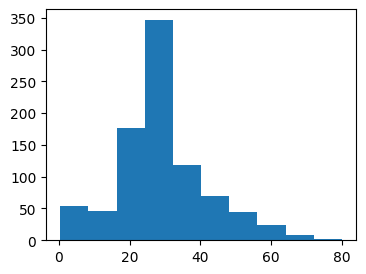

In [43]:
plt.figure(figsize=(4, 3))
matplotlib.pyplot.hist(titanic['Age'])

plt.show()

#### plot
- scatterplot of 'Fare', 'Age'

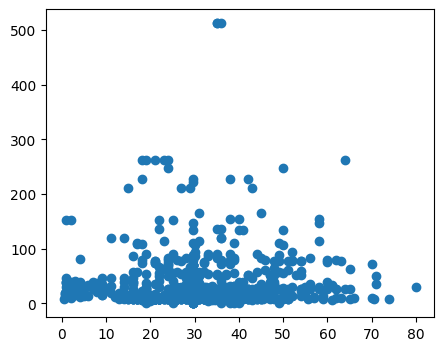

In [44]:
plt.figure(figsize=(5, 4))
matplotlib.pyplot.scatter(titanic['Age'],titanic['Fare'])
plt.show()

#### plot
- pie chart by 'Pclass'

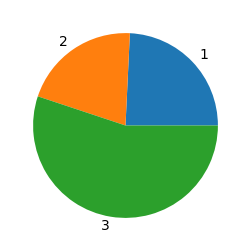

In [45]:
plt.figure(figsize=(3,3))
pclass = list(titanic['Pclass'])
size = [pclass.count(1),pclass.count(2),pclass.count(3)]
matplotlib.pyplot.pie(size,labels=[1,2,3])

plt.show()

#### plot

- bar chart by 'Pclass'

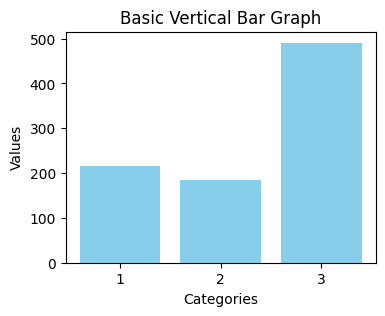

In [46]:
plt.figure(figsize = (4,3))

categories = ['1', '2', '3']
values = [pclass.count(1),pclass.count(2),pclass.count(3)]

plt.bar(categories, values, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Basic Vertical Bar Graph')

plt.show()

### Merge, join, and concatenate

In [52]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

df_a = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])

df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [53]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

df_b = pd.DataFrame(raw_data, columns = ['subject_id', 'first_name', 'last_name'])

df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [56]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

df_n = pd.DataFrame(raw_data, columns=['subject_id', 'test_id'])

df_n

,subject_id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


In [58]:
list_of_tables = [df_a, df_b]

df_new = pd.concat(list_of_tables, ignore_index=True)

# df_new = df_new.reset_index(drop=True)

df_new

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches
5,4,Billy,Bonder
6,5,Brian,Black
7,6,Bran,Balwner
8,7,Bryce,Brice
9,8,Betty,Btisan


In [59]:
df_new.loc[0]

subject_id           1
first_name        Alex
last_name     Anderson
Name: 0, dtype: object

In [60]:
pd.merge(df_new, df_n, on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [61]:
pd.merge(df_new, df_n, left_on='subject_id', right_on='subject_id')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51
1,2,Amy,Ackerman,15
2,3,Allen,Ali,15
3,4,Alice,Aoni,61
4,4,Billy,Bonder,61
5,5,Ayoung,Atiches,16
6,5,Brian,Black,16
7,7,Bryce,Brice,14
8,8,Betty,Btisan,15


In [62]:
pd.merge(df_new, df_n, on='subject_id', how='left')

,subject_id,first_name,last_name,test_id
0,1,Alex,Anderson,51.0
1,2,Amy,Ackerman,15.0
2,3,Allen,Ali,15.0
3,4,Alice,Aoni,61.0
4,5,Ayoung,Atiches,16.0
5,4,Billy,Bonder,61.0
6,5,Brian,Black,16.0
7,6,Bran,Balwner,NaN
8,7,Bryce,Brice,14.0
9,8,Betty,Btisan,15.0


In [63]:
df_new['subject_id'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8'], dtype=object)

In [64]:
df_n['subject_id'].unique()

array(['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'], dtype=object)

In [65]:
set(df_new['subject_id'].unique()) - set(df_n['subject_id'].unique())

{'6'}

In [66]:
set(df_n['subject_id'].unique()) - set(df_new['subject_id'].unique())

{'10', '11', '9'}

In [67]:
pd.merge(df_a, df_b, on='subject_id', how='outer')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


In [68]:
pd.merge(df_a, df_b, on='subject_id', how='inner')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


In [69]:
pd.merge(df_a, df_b, on='subject_id', how='left')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


In [70]:
pd.merge(df_a, df_b, on='subject_id', how='right')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan
